In [ ]:
!pip install Embeddings==0.0.8
!pip install np_utils
!pip install scikit-plot
!pip install gensim==3.8.3
!pip install vecstack
import nltk
nltk.download('stopwords')

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Fake news detection
LSTM model
"""
import getEmbeddings
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras 
from tensorflow.keras import backend as K
import pandas as pd
import np_utils
from sklearn.linear_model import LinearRegression
from vecstack import stacking
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding, Input, RepeatVector,Bidirectional
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import scikitplot.plotters as skplt
import os
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression



top_words = 5000
epoch_num = 8
batch_size = 128




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import pickle

In [ ]:
from sklearn.model_selection import train_test_split
train_ratio = 0.70
validation_ratio = 0.20
test_ratio = 0.10


path = 'datasets/train.csv'
vector_dimension=300

data = pd.read_csv(path)

missing_rows = []
for i in range(len(data)):
        if data.loc[i, 'text'] != data.loc[i, 'text']:
            missing_rows.append(i)
data = data.drop(missing_rows).reset_index().drop(['index','id'],axis=1)

for i in range(len(data)):
        data.loc[i, 'text'] = getEmbeddings.cleanup(data.loc[i,'text'])

data = data.sample(frac=1).reset_index(drop=True)

x_l = data.loc[:,'text'].values
y_l = data.loc[:,'label'].values
y_l = np.where(y_l<1, 1, 0)


xtr, xte, y_train, y_test = train_test_split(
    x_l, y_l, test_size=1 - train_ratio)
 
# performing test validation split
xvl, xte, y_val, y_test = train_test_split(
    xte, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

In [ ]:

# # Read the text data
# if not os.path.isfile('./xtr_shuffled.npy') or \
#     not os.path.isfile('./xte_shuffled.npy') or \
#     not os.path.isfile('./ytr_shuffled.npy') or \
#     not os.path.isfile('./yte_shuffled.npy'):
#     getEmbeddings.clean_data()


# xtr = np.load('./xtr_shuffled.npy', allow_pickle=True)
# xte = np.load('./xte_shuffled.npy', allow_pickle=True)
# y_train = np.load('./ytr_shuffled.npy', allow_pickle=True)
# y_test = np.load('./yte_shuffled.npy', allow_pickle=True)

cnt = Counter()
x_train = []
for x in xtr:
    x_train.append(x.split())
    for word in x_train[-1]:
        cnt[word] += 1  




In [ ]:
# Storing most common words
most_common = cnt.most_common(top_words + 1)
word_bank = {}
id_num = 1
for word, freq in most_common:
    word_bank[word] = id_num
    id_num += 1



In [ ]:
# Encode the sentences
for news in x_train:
    i = 0
    while i < len(news):
        if news[i] in word_bank:
            news[i] = word_bank[news[i]]
            i += 1
        else:
            del news[i]

y_train = list(y_train)
y_test = list(y_test)
y_val=list(y_val)


In [ ]:
# Delete the short news
i = 0
while i < len(x_train):
    if len(x_train[i]) > 10:
        i += 1
    else:
        del x_train[i]
        del y_train[i]

# Generating test data
x_test = []
for x in xte:
    x_test.append(x.split())

# Encode the sentences
for news in x_test:
    i = 0
    while i < len(news):
        if news[i] in word_bank:
            news[i] = word_bank[news[i]]
            i += 1
        else:
            del news[i]


# Generating val data
x_val = []
for x in xvl:
    x_val.append(x.split())

# Encode the sentences
for news in x_val:
    i = 0
    while i < len(news):
        if news[i] in word_bank:
            news[i] = word_bank[news[i]]
            i += 1
        else:
            del news[i]

# Truncate and pad input sequences
max_review_length = 300
X_train = sequence.pad_sequences(x_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(x_test, maxlen=max_review_length)
X_val = sequence.pad_sequences(x_val, maxlen=max_review_length)

# Convert to numpy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)
y_val=np.array(y_val)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(6770, 300)
(1000, 300)
(1000,)


In [ ]:

with open('lstm.sav' , 'rb') as f:
    model_1 = pickle.load(f)
with open('blstm.sav' , 'rb') as f:
    model_2 = pickle.load(f)
 
# putting all base model objects in one list
all_models = [model_1, model_2]

In [ ]:
# training first model
model_1.fit(X_train, y_train)
val_pred_1 = model_1.predict(X_val)
test_pred_1 = model_1.predict(X_test)
 
# converting to dataframe
val_pred_1 = pd.DataFrame(val_pred_1)
test_pred_1 = pd.DataFrame(test_pred_1)
print(val_pred_1)




212/212 [==============================] - 60s 271ms/step - loss: 0.4747 - accuracy: 0.7770
             0
0     0.335436
1     0.204804
2     0.006687
3     0.945411
4     0.990548
...        ...
1994  0.479968
1995  0.651401
1996  0.053351
1997  0.929568
1998  0.135192

[1999 rows x 1 columns]


In [ ]:

print(test_pred_1.shape)
print(val_pred_1.shape)
print(len(x))

(1000, 1)
(1999, 1)
2416


In [ ]:
# training second model
model_2.fit(X_train, y_train)
val_pred_2 = model_2.predict(X_val)
test_pred_2 = model_2.predict(X_test)
 
# converting to dataframe
val_pred_2 = pd.DataFrame(val_pred_2)
test_pred_2 = pd.DataFrame(test_pred_2)

212/212 [==============================] - 105s 477ms/step - loss: 0.4573 - accuracy: 0.7897


In [ ]:
X_val = pd.DataFrame(X_val)
val_pred_1 = pd.DataFrame(val_pred_1)
val_pred_2 = pd.DataFrame(val_pred_2)
df_val = pd.concat([X_val, val_pred_1, val_pred_2], axis=1)
df_val=np.array(df_val)


In [ ]:
X_test = pd.DataFrame(X_test)
test_pred_1 = pd.DataFrame(test_pred_1)
test_pred_2 = pd.DataFrame(test_pred_2)
df_test = pd.concat([X_test, test_pred_1, test_pred_2], axis=1)
df_test=np.array(df_test)

In [ ]:
print(df_val)
print(y_val)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.45800000e+03
  3.35436463e-01 6.66111648e-01]
 [1.47900000e+03 1.23500000e+03 1.64800000e+03 ... 2.66400000e+03
  2.04804033e-01 1.08181685e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.80600000e+03
  6.68725371e-03 2.51169801e-02]
 ...
 [1.60500000e+03 7.58000000e+02 2.22000000e+02 ... 1.22600000e+03
  5.33505380e-02 1.04141444e-01]
 [7.89000000e+02 1.46000000e+02 6.60000000e+01 ... 4.38000000e+02
  9.29568410e-01 7.74455488e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.66400000e+03
  1.35192454e-01 8.94267857e-02]]
[1 0 0 ... 0 1 0]


In [ ]:
# concatenating validation dataset along with all the predicted validation data (meta features)
# making the final model using the meta features
# final_model=LogisticRegression(solver='liblinear', random_state=0)
final_model = LinearRegression()
final_model.fit(df_val, y_val)
 
# getting the final output
final_pred = final_model.predict(df_test)

In [ ]:

 
# # computing the stack features
# s_train, s_test = stacking(all_models, X_train, y_train, X_test,regression = True, n_folds = 4, shuffle=True )
 
# # initializing the second-level model
# final_model = model_1
 
# # fitting the second level model with stack features
# final_model = final_model.fit(s_train, y_train)
 
# # predicting the final output using stacking
# pred_final = final_model.predict(X_test)
 
# # printing the root mean squared error between real value and predicted value
# # print(mean_squared_error(y_test, pred_final))

In [ ]:
y_pred = final_pred
y_pred = np.where(y_pred>0.5, 1, 0)

In [ ]:
print(final_pred)

[ 3.98783058e-02  4.39933287e-01 -5.03562343e-02  3.91005344e-01
  9.57624024e-01  5.45518431e-01  4.21804044e-02  9.31859579e-01
  3.48728961e-01  9.60197954e-01  1.66267124e-01  1.00006976e+00
 -1.82782518e-01  1.00852645e-01  1.85979894e-01 -4.51961385e-01
  7.98690507e-01  4.73628636e-01  6.79942117e-01  5.16889283e-01
  7.63189171e-01 -7.39936559e-02 -5.79165617e-02  7.40575891e-01
  1.28012343e+00  8.48135632e-01  1.01758750e+00  2.27341169e-01
  1.02428343e-02  3.73073787e-02  9.23077095e-01  3.16274733e-02
  2.48090319e-01  7.52624709e-01 -7.66501161e-02 -1.62053338e-02
  1.25683658e+00  3.36155773e-01  6.58062134e-01  1.07310926e+00
  1.07215238e+00  4.33977791e-01  1.00270711e+00  1.35178415e+00
  2.49372014e-01  3.90021015e-01 -1.24714730e-01  9.84696066e-01
  1.19960676e+00 -1.20553355e-01  4.48872536e-01 -1.93920372e-01
  1.59082927e-01  1.10287455e+00  4.22945773e-01  1.06985274e-01
  9.06544599e-01  4.62127638e-02 -3.66564667e-02  1.19028764e+00
  5.50694604e-01  6.79396

In [ ]:
m = y_test.shape[0]
tp=0
tn=0
fp=0
fn=0
for i in range(m):
    if (y_pred[i]==0 and (y_test[i]!=y_pred[i])):
        fn+=1
    elif (y_pred[i]==1 and (y_test[i]!=y_pred[i])):
        fp+=1
    elif (y_pred[i]==0 and (y_test[i]==y_pred[i])):
        tn+=1
    elif (y_pred[i]==1 and (y_test[i]==y_pred[i])):
        tp+=1

precision=(tp)/(tp+fp)*100
recall=(tp)/(tp+fn)*100
print("Accuracy = " + format((tp+tn)/(tp+tn+fp+fn)*100, '.2f') + "%")   
print("F1-Score = " + format(((2*precision*recall)/(precision+recall)), '.2f') + "%")   
print("Recall = " + format((tp)/(tp+fn)*100, '.2f') + "%")   
print("Precision = " + format((tp)/(tp+fp)*100, '.2f') + "%")   
print("Specificity = " + format((tn)/(tn+fp)*100, '.2f') + "%")  

Accuracy = 87.30%
F1-Score = 86.45%
Recall = 86.72%
Precision = 86.17%
Specificity = 87.80%


/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


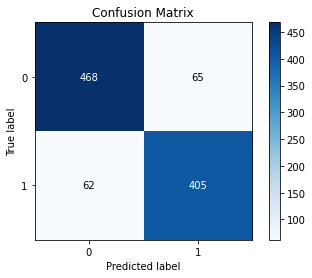

In [ ]:
# Draw the confusion matrix
def plot_cmat(y_test, ypred):
    '''Plotting confusion matrix'''
    skplt.plot_confusion_matrix(y_test, ypred)
    plt.grid(False)
    plt.show()
    
plot_cmat(y_test, y_pred)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3a2c2a1b-c190-4238-a7b0-93cabb99b4e1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>